## importing libraries

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import random
plt.style.use("default")

## Dividing dataset into training, validation and testing

In [3]:
#rb = read binary #wb = write binary #.p extension = pickle extension
with open("./data/train.p", mode = "rb") as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode = "rb") as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode = "rb") as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train["features"], train["labels"]
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


In [55]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [5]:
sign_labels = {0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
     3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (30km/h)",
     6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
     9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
     11: "Right-of-way at the next intersection", 12: "Priority road", 13: "Yield", 14: "Stop",
     15: "No vehicles", 16: "Vehicles over 3.5 metric tons prohibited", 17: "No entry",
     18: "General caution", 19: "Dangerous curve to the left", 20: "Dangerous curve to the right",
     21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
     25: "Road work", 26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing",
     29: "Bicycle crossing", 30: "Beware of ice/snow", 31: "Wild animals crossing",
     32: "End of all speed and passing limits", 33: "Turn right ahead", 34: "Turn left ahead",
     35: "Ahead only", 36: "Go straight or right", 37: "Go straight or left", 38: "Keep right",
     39: "Keep left", 40: "Roundabout mandatory", 41: "End of no passing",
     42: "End of no passing by vehicles over 3.5 metric tons"}

In [6]:
data = np.zeros(len(sign_labels))

for i in range(len(X_train)):
    data[y_train[i]] += 1

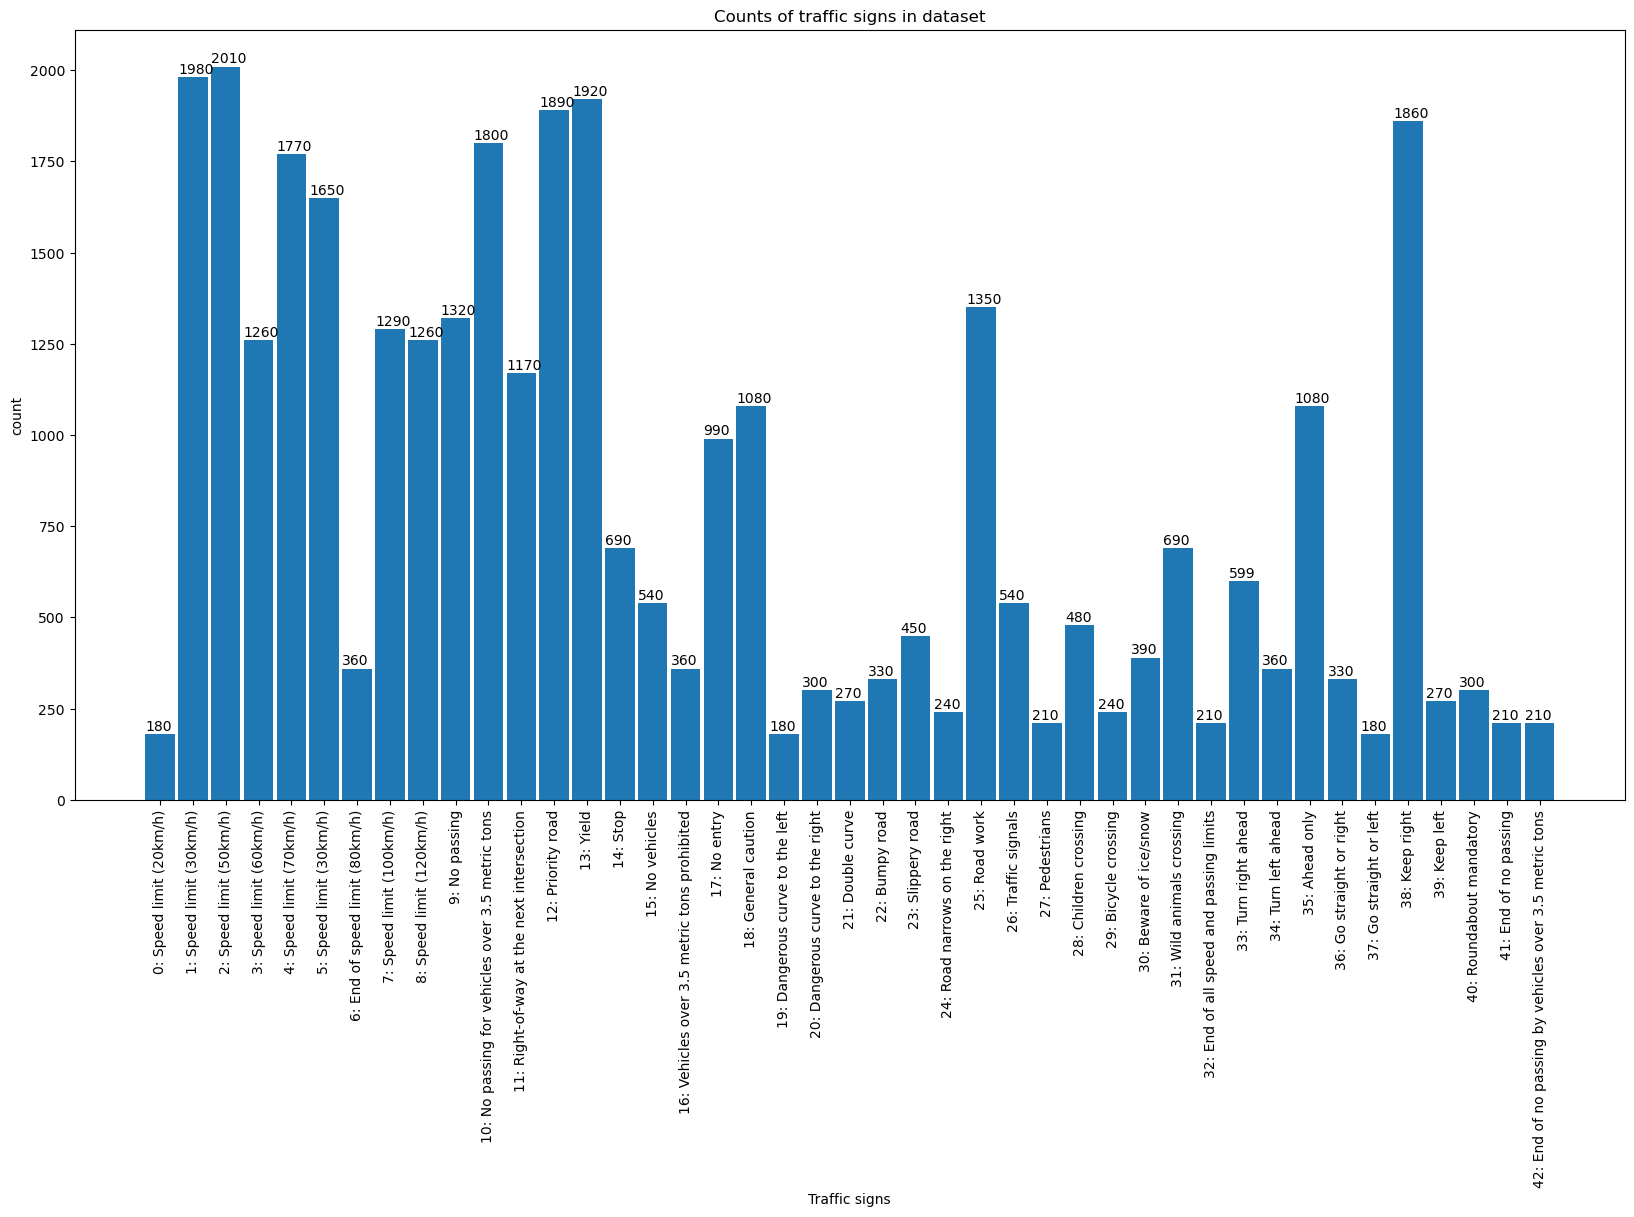

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.bar(sign_labels.keys(), data, width=0.9)
ax.set(xlabel="Traffic signs", ylabel="count")
ax.set_title('Counts of traffic signs in dataset')
ax.set_xticks(np.arange(len(sign_labels)))
ax.set_xticklabels(labels=[str(i)+": "+sign_labels[i] for i in range(len(sign_labels))],
                   rotation=90)

#show value on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+10, str(int(yval)))

```py
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True,
                                                                 shear_range=0.1,
                                                                 zoom_range=[0.1, 0.4])
```

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers

In [76]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=3/32,
                                                                 height_shift_range=3/32,
                                                                 horizontal_flip=True,)

In [57]:
print(X_train[0].shape)
sample = np.expand_dims(X_train[0], axis=0)
print(sample.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [77]:
data_generator.fit(X_train)
it = data_generator.flow(X_train, y_train, shuffle=False)
type(it)

keras_preprocessing.image.numpy_array_iterator.NumpyArrayIterator

In [78]:
batch_images, batch_labels = next(it)
type(batch_images), type(batch_labels)

(numpy.ndarray, numpy.ndarray)

In [66]:
batch_images.shape, batch_labels.shape

((32, 32, 32, 3), (32,))

In [70]:
def visualize_data(images):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
    plt.show()

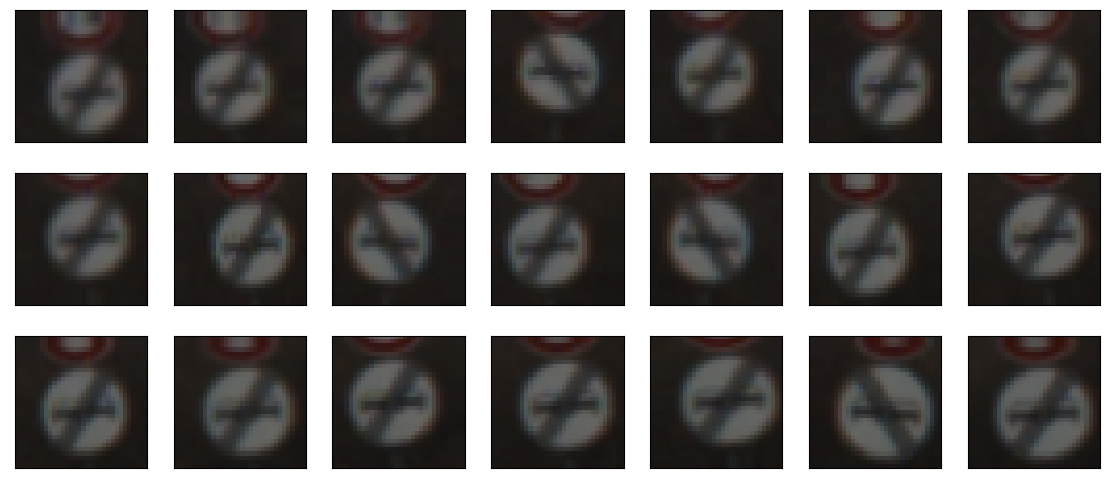

In [79]:
visualize_data(batch_images)

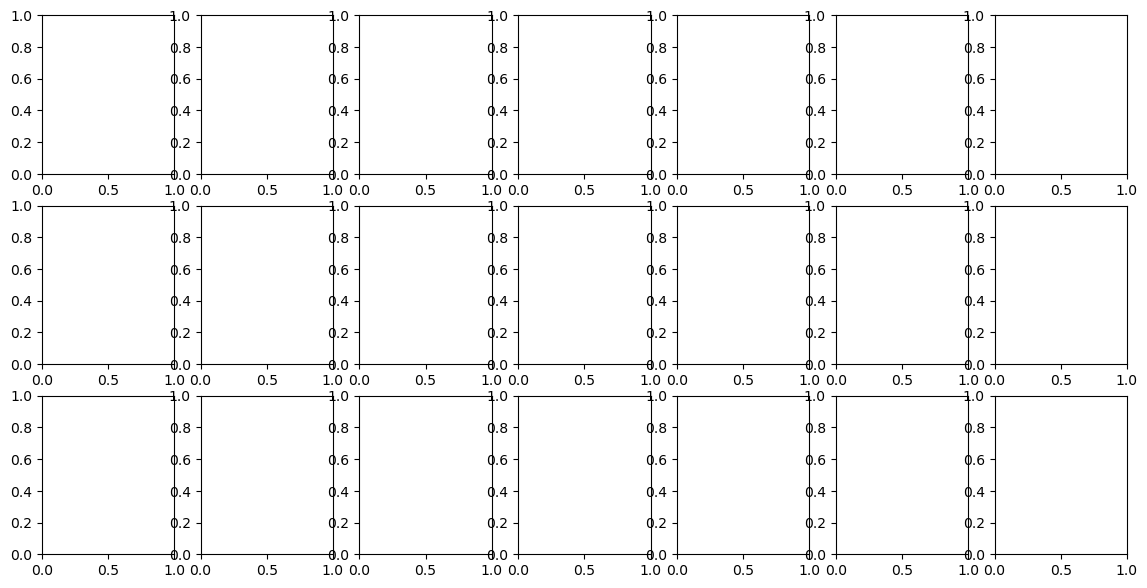

In [89]:
fig, ax = plt.subplots(3, 7, figsize=(14, 7))

for i, ax in enumerate(ax.flat):
    axi.imshow(X_valid[i])
    axi.set(xticks=[], yticks=[])